## DATA ACQUISITION

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import pprint
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import tree
%matplotlib inline
url="https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
name=['buying','maint','doors','persons','lug_boot','safety','class']
data=pd.read_csv(url,names=name)

In [51]:
#VISUALISING THE ROWS AND COLUMNS
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [52]:
data.shape

(1728, 7)

In [53]:
print(list(data.columns))

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [54]:
data["maint"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

## DATA CLEANING

In [55]:
data.dropna()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [2]:
a={'vhigh':4, 'high':3, 'med':2, 'low':1}
b={'small':1, 'med':2, 'big':3,'5more':5,'more':5,'2':2,'3':3,'4':4}
c={ 'low':1, 'med':2, 'high':3,'unacc':0, 'acc':1, 'good':2, 'vgood':3}

k=data.replace({'buying':a,'maint':a,'doors':b,'persons':b,'lug_boot':b,'safety':c,'class':c})
k

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0
5,4,4,2,2,2,3,0
6,4,4,2,2,3,1,0
7,4,4,2,2,3,2,0
8,4,4,2,2,3,3,0
9,4,4,2,4,1,1,0


In [57]:
set(k["class"])

{0, 1, 2, 3}

In [58]:
k.isnull().persons.any()

False

In [59]:
k.isnull()

,buying,maint,doors,persons,lug_boot,safety,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


## DATA EXPLORATION

In [60]:
k['safety'].value_counts()


3    576
2    576
1    576
Name: safety, dtype: int64

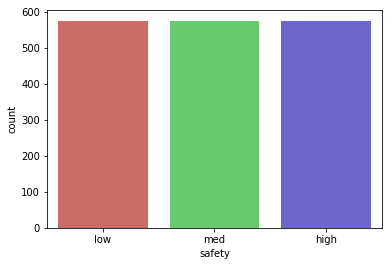

In [61]:
sns.countplot(x='safety',data=data,palette='hls')
plt.show()

In [62]:
k.groupby('doors').mean()

,buying,maint,persons,lug_boot,safety,class
doors,,,,,,
2,2.5,2.5,3.666667,2.0,2.0,0.326389
3,2.5,2.5,3.666667,2.0,2.0,0.416667
4,2.5,2.5,3.666667,2.0,2.0,0.458333
5,2.5,2.5,3.666667,2.0,2.0,0.458333


## DATA ANALYSING

### CORRELATION

In [63]:
k.corr()

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.282750
maint,0.00000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.232422
doors,0.00000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.066057
persons,0.00000,0.000000,0.000000,1.000000e+00,2.523651e-19,0.000000,0.373459
lug_boot,0.00000,0.000000,0.000000,2.523651e-19,1.000000e+00,0.000000,0.157932
safety,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.439337
class,-0.28275,-0.232422,0.066057,3.734592e-01,1.579317e-01,0.439337,1.000000


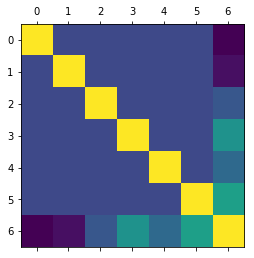

In [64]:
#PLOTTING1
plt.matshow(k.corr())
plt.show()

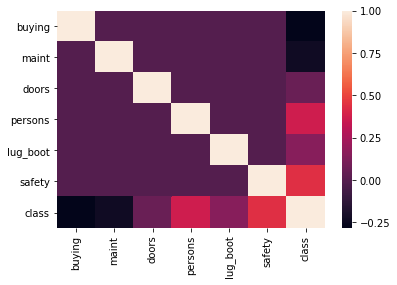

In [65]:
#PLOTTING2
import seaborn as sns
corr = k.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

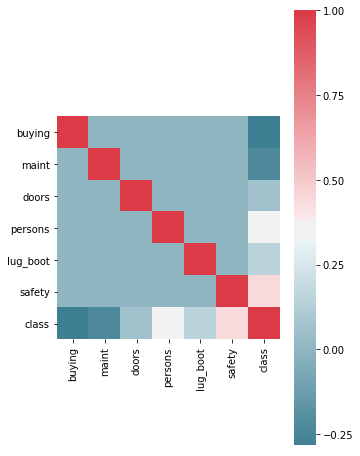

In [66]:
#PLOTTING3
import seaborn as sns

f, ax = plt.subplots(figsize=(5, 8))
corr = k.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

## DATA VALIDATION
## Compare Machine Learning Algorithms Consistently

### 1.Checking wheather data set is sufficient


In [67]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


In [3]:
array=k.values
array

array([[4, 4, 2, ..., 1, 1, 0],
       [4, 4, 2, ..., 1, 2, 0],
       [4, 4, 2, ..., 1, 3, 0],
       ..., 
       [1, 1, 5, ..., 3, 1, 0],
       [1, 1, 5, ..., 3, 2, 2],
       [1, 1, 5, ..., 3, 3, 3]])

In [4]:
X=array[:,0:6]#attribute
Y=array[:,6]#class
validation_size=0.30
seed=4
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)





#### MODELS
1.LogisticRegression

2.KNeighborsClassifier

3.DecisionTreeClassifier

4.Naive Bayes

5.Support Vector Machines

LR: 0.749421 (0.120625)
KNN: 0.887153 (0.078531)
CART: 0.836806 (0.105870)
NB: 0.700231 (0.033684)
SVM: 0.895255 (0.039143)


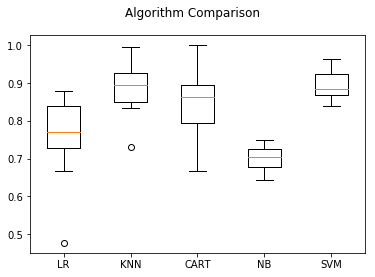

In [5]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=8, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Accuracy:Support Vector Machines

## LOGISTIC REGRESSION

In [6]:
LogReg = LogisticRegression()
LogReg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
y_pred = LogReg.predict(X_validation)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3,
       1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0,

### single value prediction

In [15]:
a=[[1,1,5,5,3,2]]
f=LogReg.predict(a)
f

array([2])

### confusion matrix,accuracy score

In [74]:
confusion_matrix = confusion_matrix(Y_validation, y_pred)
confusion_matrix

array([[350,   5,   4,   9],
       [ 50,  63,   4,   0],
       [  0,  10,   5,   2],
       [  0,  12,   0,   5]])

In [75]:
accuracy_score=accuracy_score(Y_validation, y_pred)
accuracy_score

0.81502890173410403

## KNeighborsClassifier

In [11]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [12]:
a_pred = neigh.predict(X_validation)
a_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0,
       0, 3, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 3, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 1, 0, 0, 0,
       0, 0,

### Single value prediction

In [14]:
a=[[1,1,2,5,3,2]]
f=neigh.predict(a)
f

array([2])

## DecisionTreeClassifier

In [82]:

model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
d_pred = model.predict(X_validation)
d_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 3, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 3, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0,
       2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 1, 0, 0, 0,
       0, 0,

In [84]:
a=[[1,1,5,4,3,3]]
f=model.predict(a)
f

array([3])

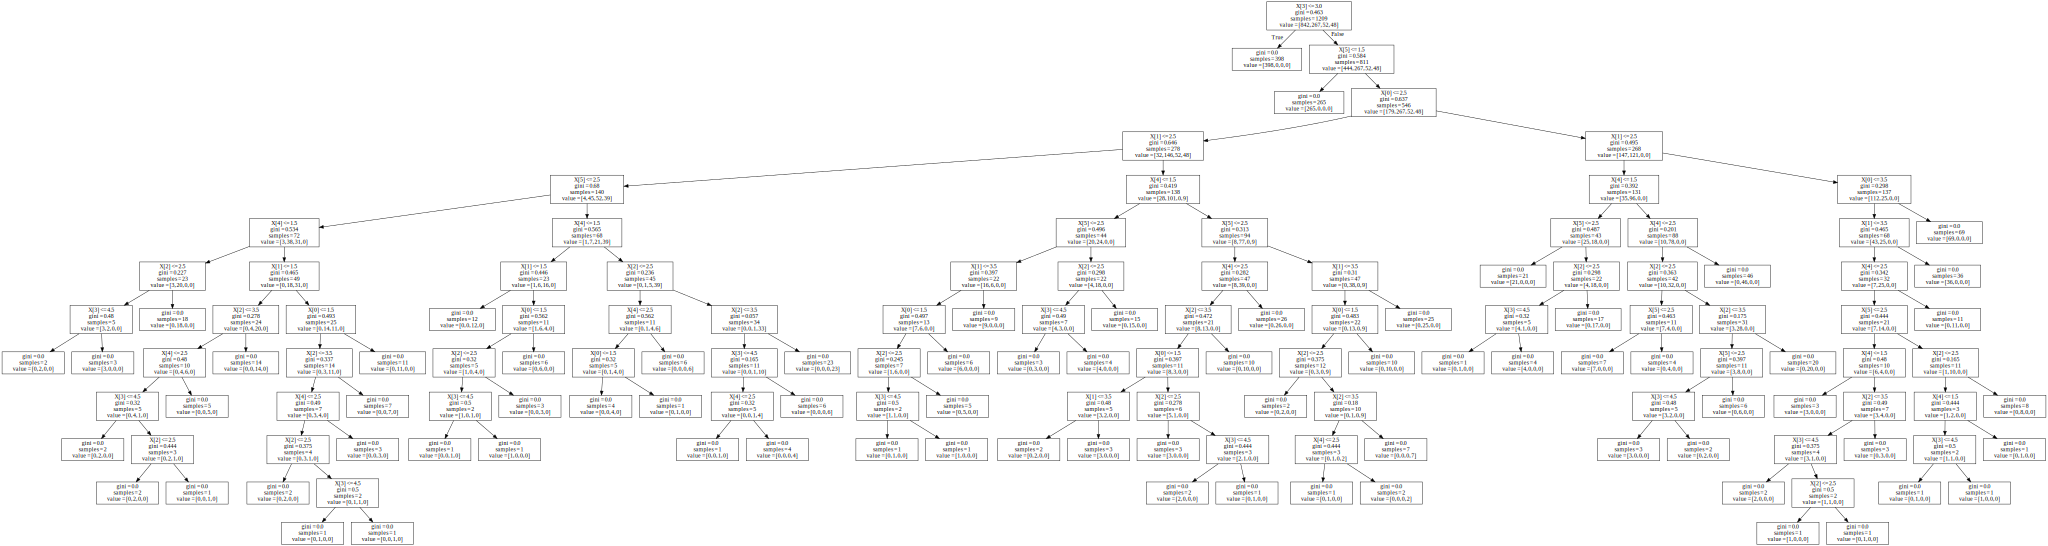

In [113]:
from sklearn import tree
import graphviz

with open("model.dot", "w") as f:
    tree.export_graphviz(model, out_file=f)
DT=tree.export_graphviz(model, out_file=None)
graph=graphviz.Source(DT)
graph

To convert to pdf
### $dot -Tpdf fruit_classifier.dot -o fruit_classifier.pdf  

###### Get the data from model.dot and paste it in http://webgraphviz.com/